In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("Admission_Predict.csv")
data.head() #gre=graduate record examination   sop=statement of purpose

,gre,sop,cgpa,admitted
0,337,4.5,9.65,1
1,324,4.0,8.87,1
2,316,3.0,8.00,1
3,322,3.5,8.67,1
4,314,2.0,8.21,0


In [4]:
data.shape

(400, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gre       400 non-null    int64  
 1   sop       400 non-null    float64
 2   cgpa      400 non-null    float64
 3   admitted  400 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 12.6 KB


In [8]:
data.duplicated().sum()

np.int64(2)

In [9]:
data = data.drop_duplicates()

In [10]:
data.shape

(398, 4)

In [23]:
data.describe()

,gre,sop,cgpa,admitted
count,398.000000,398.000000,398.000000,398.000000
mean,316.801508,3.395729,8.597889,0.547739
std,11.494311,1.006181,0.597319,0.498342
min,290.000000,1.000000,6.800000,0.000000
25%,308.000000,2.500000,8.170000,0.000000
50%,317.000000,3.500000,8.610000,1.000000
75%,325.000000,4.000000,9.060000,1.000000
max,340.000000,5.000000,9.920000,1.000000


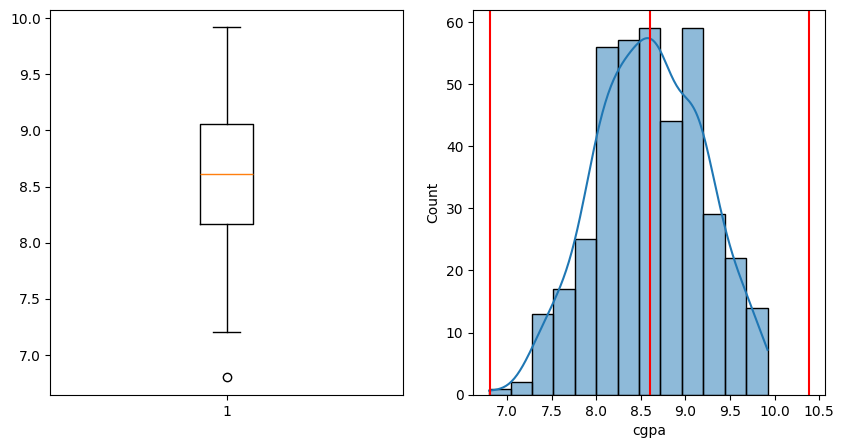

In [27]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(data['cgpa'])
plt.subplot(1,2,2)
mean = data['cgpa'].mean()
std = data['cgpa'].std()
sns.histplot(data['cgpa'],kde=True)
plt.axvline(mean,color="red")
plt.axvline(mean+3*std,color="red")
plt.axvline(mean-3*std,color="red")
plt.show()

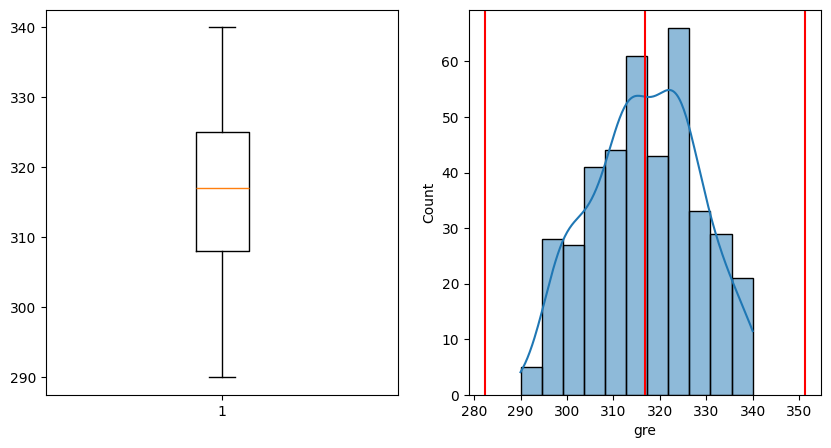

In [28]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(data['gre'])
plt.subplot(1,2,2)
mean = data['gre'].mean()
std = data['gre'].std()
sns.histplot(data['gre'],kde=True)
plt.axvline(mean,color="red")
plt.axvline(mean+3*std,color="red")
plt.axvline(mean-3*std,color="red")
plt.show()

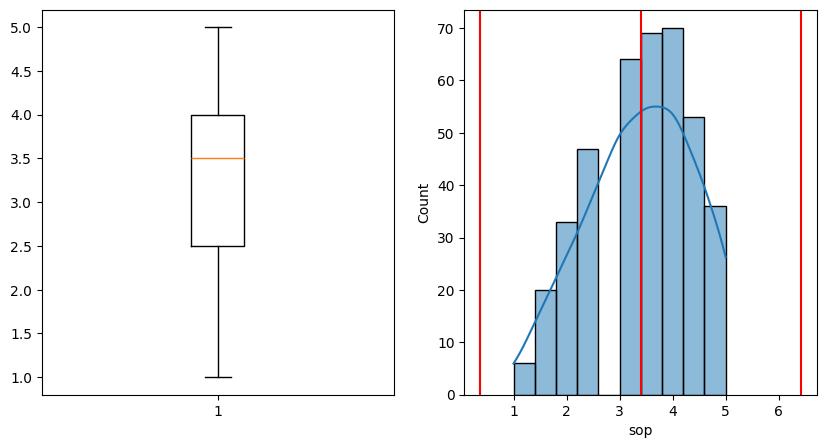

In [29]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(data['sop'])
plt.subplot(1,2,2)
mean = data['sop'].mean()
std = data['sop'].std()
sns.histplot(data['sop'],kde=True)
plt.axvline(mean,color="red")
plt.axvline(mean+3*std,color="red")
plt.axvline(mean-3*std,color="red")
plt.show()

In [30]:
data['admitted'].value_counts()

admitted
1    218
0    180
Name: count, dtype: int64

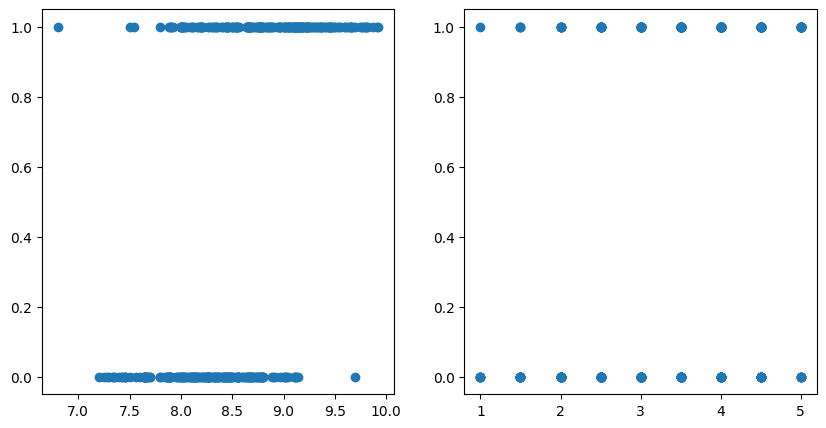

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(data['cgpa'],data['admitted'])
plt.subplot(1,2,2)
plt.scatter(data['sop'],data['admitted'])
plt.show()

In [37]:
X = data.drop('admitted',axis=1)
y = data['admitted']

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=25)

In [43]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [44]:
log.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [45]:
pred_test = log.predict(x_test)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_test,pred_test)

0.8

In [49]:
log = LogisticRegression()
from sklearn.model_selection import cross_validate
result = cross_validate(log,x_train,y_train)

In [50]:
result

{'fit_time': array([0.04115963, 0.05209136, 0.044065  , 0.05228591, 0.0593009 ]),
 'score_time': array([0.0059154 , 0.00424886, 0.00467277, 0.00426197, 0.00413489]),
 'test_score': array([0.6875    , 0.671875  , 0.796875  , 0.6984127 , 0.77777778])}

In [51]:
result['test_score'].mean()

np.float64(0.7264880952380952)